In [55]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split

In [56]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
#import seaborn as sns
%matplotlib inline
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import learning_curve
import warnings
warnings.filterwarnings('ignore')

In [57]:
df=pd.read_csv("https://archive.ics.uci.edu/ml/machine-learning-databases/magic/magic04.data",
               names=["fLength","fWidth","fSize","fConc","fConc1","fAsym","fM3Long","fm3Trans","fAlpha","fDist","Class"])

In [58]:
df.head()

,fLength,fWidth,fSize,fConc,fConc1,fAsym,fM3Long,fm3Trans,fAlpha,fDist,Class
0,28.7967,16.0021,2.6449,0.3918,0.1982,27.7004,22.0110,-8.2027,40.0920,81.8828,g
1,31.6036,11.7235,2.5185,0.5303,0.3773,26.2722,23.8238,-9.9574,6.3609,205.2610,g
2,162.0520,136.0310,4.0612,0.0374,0.0187,116.7410,-64.8580,-45.2160,76.9600,256.7880,g
3,23.8172,9.5728,2.3385,0.6147,0.3922,27.2107,-6.4633,-7.1513,10.4490,116.7370,g
4,75.1362,30.9205,3.1611,0.3168,0.1832,-5.5277,28.5525,21.8393,4.6480,356.4620,g


In [59]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19020 entries, 0 to 19019
Data columns (total 11 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   fLength   19020 non-null  float64
 1   fWidth    19020 non-null  float64
 2   fSize     19020 non-null  float64
 3   fConc     19020 non-null  float64
 4   fConc1    19020 non-null  float64
 5   fAsym     19020 non-null  float64
 6   fM3Long   19020 non-null  float64
 7   fm3Trans  19020 non-null  float64
 8   fAlpha    19020 non-null  float64
 9   fDist     19020 non-null  float64
 10  Class     19020 non-null  object 
dtypes: float64(10), object(1)
memory usage: 1.6+ MB


In [60]:
df.isnull().sum()

fLength     0
fWidth      0
fSize       0
fConc       0
fConc1      0
fAsym       0
fM3Long     0
fm3Trans    0
fAlpha      0
fDist       0
Class       0
dtype: int64

In [61]:
X = df.iloc[:,0:-1]
y = df['Class']

In [68]:
samples = []
for i in range(10):
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, shuffle=True)
    samples.append((X_train, X_test, y_train, y_test))

In [78]:
samples

[(        fLength   fWidth   fSize   fConc  fConc1     fAsym  fM3Long  fm3Trans  \
  16289   26.6653   5.4643  2.0500  0.7274  0.3779  -27.4453 -17.8363    4.8044   
  10173   26.3101  12.0873  2.4843  0.5574  0.3066   22.4900  23.7883    9.4817   
  13640  105.0970  37.5284  2.8701  0.2428  0.1531  102.2550  23.2937   11.8226   
  4714    43.3724  31.0202  3.4532  0.1838  0.1048   48.9576  37.6172  -20.5515   
  14207  109.0900  84.4418  3.7182  0.1474  0.0983   14.6339 -33.7500  -37.4827   
  ...         ...      ...     ...     ...     ...       ...      ...       ...   
  5589    37.6859  14.4913  2.5694  0.3342  0.1712   23.3557  26.5261    9.8269   
  116     27.4888  18.5665  2.8639  0.3078  0.1854    2.8405   6.1522  -10.0668   
  3064    13.1000  10.3364  2.2109  0.7877  0.5077   12.7159   6.3277    9.8957   
  2251    81.8050  21.9195  2.7482  0.4196  0.2188 -100.8820 -38.8638    9.2331   
  18711   86.3950  14.5450  2.7072  0.3194  0.1716  -96.5502  67.2617  -11.3798   
  
 

In [70]:
kernels = ['linear', 'poly', 'rbf', 'sigmoid']
result = pd.DataFrame(columns=['Sample', 'Best Accuracy', 'Best Kernel', 'Best Nu', 'Best Epsilon'])

In [71]:
def fitnessFunction(kernel, C, gamma):
  svm = SVC(kernel=kernel, C=C, gamma=gamma, max_iter=1000)
  svm.fit(X_train, y_train)
  y_pred = svm.predict(X_test)
  return accuracy_score(y_pred, y_test)
     

In [72]:
for i in range(len(samples)):
  best_accuracy = 0
  best_C = 0
  best_gamma = 0
  for kernel in kernels:
    X_train, X_test, y_train, y_test = samples[i]
    C = np.random.uniform(0, 10)
    gamma = np.random.uniform(0, 10)
    score = fitnessFunction(kernel, C, gamma)
    if score>best_accuracy:
      best_accuracy = round(score, 2)
      best_C = round(C, 2)
      best_gamma = round(gamma, 2)
      best_kernel = kernel
  print('Best Accuracy = ', best_accuracy, 'Best Kernel = ', best_kernel, 'Best Nu = ', best_C, 'Best Epsilon = ', best_gamma)
  result.loc[i] = [i+1, best_accuracy, best_kernel, best_C, best_gamma]

Best Accuracy =  0.4 Best Kernel =  sigmoid Best Nu =  3.99 Best Epsilon =  5.3
Best Accuracy =  0.65 Best Kernel =  rbf Best Nu =  8.63 Best Epsilon =  6.29
Best Accuracy =  0.57 Best Kernel =  linear Best Nu =  9.83 Best Epsilon =  0.13
Best Accuracy =  0.45 Best Kernel =  linear Best Nu =  4.63 Best Epsilon =  8.9
Best Accuracy =  0.37 Best Kernel =  sigmoid Best Nu =  0.66 Best Epsilon =  6.71
Best Accuracy =  0.61 Best Kernel =  linear Best Nu =  0.63 Best Epsilon =  8.88
Best Accuracy =  0.49 Best Kernel =  linear Best Nu =  3.35 Best Epsilon =  3.57
Best Accuracy =  0.57 Best Kernel =  linear Best Nu =  6.54 Best Epsilon =  2.52
Best Accuracy =  0.39 Best Kernel =  sigmoid Best Nu =  7.18 Best Epsilon =  3.99
Best Accuracy =  0.66 Best Kernel =  rbf Best Nu =  7.93 Best Epsilon =  4.0


In [73]:
result

,Sample,Best Accuracy,Best Kernel,Best Nu,Best Epsilon
0,1,0.40,sigmoid,3.99,5.30
1,2,0.65,rbf,8.63,6.29
2,3,0.57,linear,9.83,0.13
3,4,0.45,linear,4.63,8.90
4,5,0.37,sigmoid,0.66,6.71
5,6,0.61,linear,0.63,8.88
6,7,0.49,linear,3.35,3.57
7,8,0.57,linear,6.54,2.52
8,9,0.39,sigmoid,7.18,3.99
9,10,0.66,rbf,7.93,4.00


In [74]:
X_train, X_test, y_train, y_test = samples[result['Best Accuracy'].idxmax()]

In [75]:
train_sizes, train_scores, test_scores = learning_curve(SVC(kernel=result['Best Kernel'].iloc[result['Best Accuracy'].idxmax()], 
                                                        C=result['Best Nu'].iloc[result['Best Accuracy'].idxmax()],
                                                        gamma=result['Best Epsilon'].iloc[result['Best Accuracy'].idxmax()],
                                                        max_iter = 1000), X_train, y_train, cv=10, scoring='accuracy', n_jobs=-1,
                                                        train_sizes = np.linspace(0.01, 1.0, 50))
     

In [76]:
train_mean = np.mean(train_scores, axis=1)
test_mean = np.mean(test_scores, axis=1)

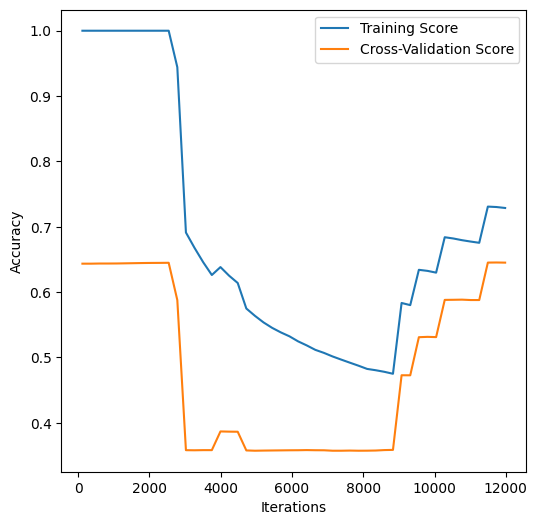

In [77]:
plt.figure(figsize=(6, 6))
plt.plot(train_sizes, train_mean, label='Training Score')
plt.plot(train_sizes, test_mean, label='Cross-Validation Score')
plt.xlabel('Iterations')
plt.ylabel('Accuracy')
plt.legend(loc="best")
plt.show()